In [1]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

C:\Users\aaguilar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# The tech stocks we'll use for this analysis
ticker = 'MSFT'

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 2,end.month,end.day)


# Creating loop for grabing yahoo finance data and setting as a dataframe

  
    #To set DataFrame as the Stock Ticker
    
df = web.DataReader(ticker,'yahoo',start,end)['Adj Close']

In [3]:
df.head()

Date
2018-04-02    85.913963
2018-04-03    87.068924
2018-04-04    89.611801
2018-04-05    89.660324
2018-04-06    87.573624
Name: Adj Close, dtype: float64

In [4]:
df.tail()

Date
2020-03-26    156.110001
2020-03-27    149.699997
2020-03-30    160.229996
2020-03-31    157.710007
2020-04-01    152.110001
Name: Adj Close, dtype: float64

In [5]:
df.shape

(505,)

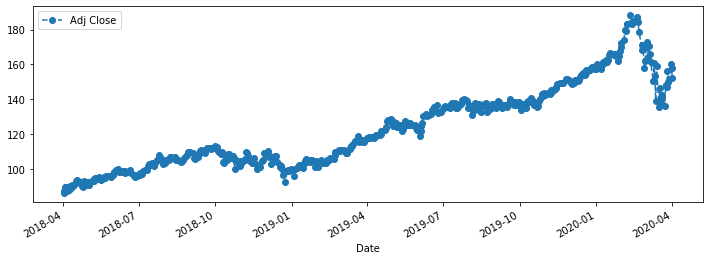

In [6]:
df.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')



In [7]:
df.describe()

count    505.000000
mean     123.187385
std       23.565406
min       85.913963
25%      104.200470
50%      117.722450
75%      137.980042
max      188.185989
Name: Adj Close, dtype: float64

In [8]:
df
df.head()

Date
2018-04-02    85.913963
2018-04-03    87.068924
2018-04-04    89.611801
2018-04-05    89.660324
2018-04-06    87.573624
Name: Adj Close, dtype: float64

In [9]:
df.describe()

count    505.000000
mean     123.187385
std       23.565406
min       85.913963
25%      104.200470
50%      117.722450
75%      137.980042
max      188.185989
Name: Adj Close, dtype: float64

In [10]:
df = df.reset_index()

In [11]:
df.head()

,Date,Adj Close
0,2018-04-02,85.913963
1,2018-04-03,87.068924
2,2018-04-04,89.611801
3,2018-04-05,89.660324
4,2018-04-06,87.573624


In [12]:
df[['ds','y']] = df[['Date' ,'Adj Close']]

In [13]:
df = df[['ds','y']]
df.head(20)

mon2 = df

mon2['Weekday'] = mon2['ds'].dt.day_name()


mon2 =  mon2[(mon2['Weekday'] == 'Monday')]

mon2.head()


,ds,y,Weekday
0,2018-04-02,85.913963,Monday
5,2018-04-09,88.097717,Monday
10,2018-04-16,91.397629,Monday
15,2018-04-23,92.542877,Monday
20,2018-04-30,90.766754,Monday


In [14]:
# Importing the prophet library:

import fbprophet

Importing plotly failed. Interactive plots will not work.


In [15]:
# After importing the prophet library we need to create an instance of a Prophet object
#Instantiating: Instantiation − The creation of an instance of a class. Method − A special kind of function that is defined in a class definition. Object − A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
#https://www.tutorialspoint.com/python/python_classes_objects.htm

m = fbprophet.Prophet()

In [16]:
# Now we have to use the fit method on the prophet object and pass in our dataframe because we need to fit our model to our historical data.

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
# Now it is time to create future dates, using Prophet and its builtin helper function "make_future_dataframe"

future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2018-04-02
1,2018-04-03
2,2018-04-04
3,2018-04-05
4,2018-04-06


In [18]:
# Now it is time to predict future stock prices using the predict method

forecast = m.predict(future)

forecast.tail(10)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
860,2021-03-23,178.128093,102.172248,255.081508,103.008261,256.081303,-2.272712,-2.272712,-2.272712,0.930027,0.930027,0.930027,-3.202739,-3.202739,-3.202739,0.0,0.0,0.0,175.855381
861,2021-03-24,178.191082,100.338596,254.717376,102.824039,256.550640,-2.258055,-2.258055,-2.258055,0.866643,0.866643,0.866643,-3.124698,-3.124698,-3.124698,0.0,0.0,0.0,175.933027
862,2021-03-25,178.254072,100.076847,254.629620,102.639817,256.994679,-1.876400,-1.876400,-1.876400,1.138885,1.138885,1.138885,-3.015285,-3.015285,-3.015285,0.0,0.0,0.0,176.377672
863,2021-03-26,178.317061,101.323259,254.917854,102.455595,257.120503,-1.775177,-1.775177,-1.775177,1.106644,1.106644,1.106644,-2.881821,-2.881821,-2.881821,0.0,0.0,0.0,176.541884
864,2021-03-27,178.380051,98.095009,253.556305,102.271373,257.606065,-5.017344,-5.017344,-5.017344,-2.285911,-2.285911,-2.285911,-2.731432,-2.731432,-2.731432,0.0,0.0,0.0,173.362707
865,2021-03-28,178.443040,96.652354,252.709932,102.087151,258.176810,-4.856815,-4.856815,-4.856815,-2.285911,-2.285911,-2.285911,-2.570904,-2.570904,-2.570904,0.0,0.0,0.0,173.586225
866,2021-03-29,178.506030,99.260245,256.900323,101.902929,258.691795,-1.876917,-1.876917,-1.876917,0.529624,0.529624,0.529624,-2.406541,-2.406541,-2.406541,0.0,0.0,0.0,176.629112
867,2021-03-30,178.569019,100.858863,258.447616,101.718707,259.189507,-1.314024,-1.314024,-1.314024,0.930027,0.930027,0.930027,-2.244051,-2.244051,-2.244051,0.0,0.0,0.0,177.254995
868,2021-03-31,178.632009,98.913346,257.863147,101.534485,259.570026,-1.221801,-1.221801,-1.221801,0.866643,0.866643,0.866643,-2.088444,-2.088444,-2.088444,0.0,0.0,0.0,177.410208
869,2021-04-01,178.694998,97.395637,257.226734,101.350263,259.911690,-0.805075,-0.805075,-0.805075,1.138885,1.138885,1.138885,-1.943960,-1.943960,-1.943960,0.0,0.0,0.0,177.889923


In [19]:
forecast['Weekday'] = forecast['ds'].dt.day_name()

forecast

mon =  forecast[(forecast['Weekday'] == 'Monday')]

mon = mon[['ds','yhat']]

Stockpre = pd.merge(mon, mon2, on ='ds')

Stockpre["tom"] = Stockpre["yhat"].shift(-1)

Stockpre.head(200)

,ds,yhat,y,Weekday,tom
0,2018-04-02,88.395574,85.913963,Monday,89.913815
1,2018-04-09,89.913815,88.097717,Monday,90.798217
2,2018-04-16,90.798217,91.397629,Monday,91.804657
3,2018-04-23,91.804657,92.542877,Monday,92.981006
4,2018-04-30,92.981006,90.766754,Monday,93.565264
...,...,...,...,...,...
92,2020-03-02,163.565720,172.789993,Monday,156.736315
93,2020-03-09,156.736315,150.619995,Monday,152.844659
94,2020-03-16,152.844659,135.419998,Monday,152.479962
95,2020-03-23,152.479962,135.979996,Monday,153.903137


In [20]:
yhat = delta = total = cost = 0.0
status = "cash"
first = Stockpre['y'][0]
final = Stockpre['y'].iloc[-1]
boring = final - first
tradecount = 0

log = pd.DataFrame(columns=['Date', 'Action', 'Stock Price', 'Predicted Value','Profit', 'Trade Count'])
 

for index, row in Stockpre.iterrows():
    print(index)
    print(f" On {row['ds']}")
    #check predicition value for next week "yhat" vs the current ticker value "current"
    if row['tom'] >= row['y']:
        #If holding cash, initiate buy, set cost to current stock price 'y' 
        #reset "current" for comparison, change status to holding stock 
        if status == "cash":
            tradecount =  tradecount + 1
            cost = row['y']
            print(f" bought stock @ {cost}: price {row['y']} vs {row['tom']} ")
                  
            log = log.append({'Date': row['ds'], 'Action': 'BUY', 'Stock Price': row['y'], 'Profit' : total,
                              'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)

            status = "hold"
        
        elif status == "hold":
            print(f" held stock @ cost {cost} : price {row['y']} vs {row['tom']}")
            log = log.append({'Date': row['ds'], 'Action': 'HOLD STOCK', 'Stock Price': row['y'], 'Profit' : total,
                              'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)

    elif row['tom'] < row['y']:
        if status == "hold":
            tradecount =  tradecount + 1
            print(f" sold @ cost {cost} : price {row['y']} vs {row['tom']}")           
            delta = row['y'] - cost
            total = total + delta
            status = "cash"
            cost = 0.0
            print(f" profit {delta}")
                  
            log = log.append({'Date': row['ds'], 'Action': 'SELL', 'Stock Price': row['y'], 'Profit' : total,
                              'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)
            
                  
        elif status == "cash" :
            
            print(f" held cash : price {row['y']} vs {row['tom']}")
                                    
            log = log.append({'Date': row['ds'], 'Action': 'HOLD CASH', 'Stock Price': row['y'], 'Profit' : total,
                              'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)

if status == "hold":
    delta = final - cost
    total = total + delta 
    print(f"Final Networth :  cash {total}")
    
    log = log.append({'Date': Stockpre['ds'].iloc[-1], 'Action': 'FINAL SELL', 'Stock Price': Stockpre['y'].iloc[-1], 'Profit' : total,
                    'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)
                  
if status == "cash":
    print(f"Final Networth :  cash {total}")
    
    log = log.append({'Date': Stockpre['ds'].iloc[-1], 'Action': 'HELD CASH', 'Stock Price': Stockpre['y'].iloc[-1], 'Profit' : total,
                    'Predicted Value': row['tom'],'Trade Count': tradecount}, ignore_index=True)

print(f"If you had bought and held from day 1, {first} to {final}, you'd have made {boring} ")


0
 On 2018-04-02 00:00:00
 bought stock @ 85.9139633178711: price 85.9139633178711 vs 89.91381497906144 
1
 On 2018-04-09 00:00:00
 held stock @ cost 85.9139633178711 : price 88.09771728515625 vs 90.79821684514695
2
 On 2018-04-16 00:00:00
 held stock @ cost 85.9139633178711 : price 91.39762878417969 vs 91.80465654922187
3
 On 2018-04-23 00:00:00
 held stock @ cost 85.9139633178711 : price 92.54287719726562 vs 92.98100576640789
4
 On 2018-04-30 00:00:00
 held stock @ cost 85.9139633178711 : price 90.76675415039062 vs 93.5652638448082
5
 On 2018-05-07 00:00:00
 sold @ cost 85.9139633178711 : price 93.38726806640625 vs 93.20916979791659
 profit 7.473304748535156
6
 On 2018-05-14 00:00:00
 held cash : price 95.14398956298828 vs 92.76272723828207
7
 On 2018-05-21 00:00:00
 bought stock @ 95.1372299194336: price 95.1372299194336 vs 95.4442303369685 
8
 On 2018-06-04 00:00:00
 sold @ cost 95.1372299194336 : price 99.10453033447266 vs 97.52183178500714
 profit 3.9673004150390625
9
 On 2018-06

96
 On 2020-03-30 00:00:00
Final Networth :  cash 145.79559326171875
If you had bought and held from day 1, 85.9139633178711 to 160.22999572753906, you'd have made 74.31603240966797 


In [21]:
# Visualisation:
log
# m.plot(forecast);

,Date,Action,Stock Price,Predicted Value,Profit,Trade Count
0,2018-04-02,BUY,85.913963,89.913815,0.000000,1
1,2018-04-09,HOLD STOCK,88.097717,90.798217,0.000000,1
2,2018-04-16,HOLD STOCK,91.397629,91.804657,0.000000,1
3,2018-04-23,HOLD STOCK,92.542877,92.981006,0.000000,1
4,2018-04-30,HOLD STOCK,90.766754,93.565264,0.000000,1
...,...,...,...,...,...,...
92,2020-03-02,HOLD CASH,172.789993,156.736315,136.185593,32
93,2020-03-09,BUY,150.619995,152.844659,136.185593,33
94,2020-03-16,HOLD STOCK,135.419998,152.479962,136.185593,33
95,2020-03-23,HOLD STOCK,135.979996,153.903137,136.185593,33


In [37]:
# SQLAlchemy
from sqlalchemy import create_engine
import sqlite3


# Path to sqlite
database_path = "..flask site/static/numbers.sqlite"

# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM numbers", conn)



OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/e3q8)

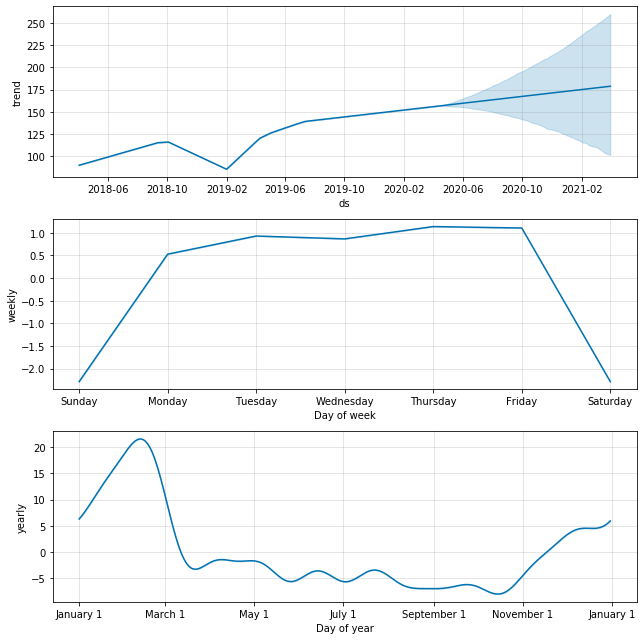

In [23]:
# If you want to visualize the individual forecast components, you can use Prophet’s built-in plot_components method:

m.plot_components(forecast);

In [24]:
df.describe()

,y
count,505.000000
mean,123.187385
std,23.565406
min,85.913963
25%,104.200470
50%,117.722450
75%,137.980042
max,188.185989


In [25]:
df.shape

(505, 3)

In [26]:
forecast.shape

(870, 20)

In [27]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.0,870.0,870.0,870.000000
mean,141.203802,125.844845,158.137932,128.605405,154.614026,0.463159,0.463159,0.463159,0.534308,0.534308,0.534308,-0.071149,-0.071149,-0.071149,0.0,0.0,0.0,141.666961
std,28.114759,21.196614,45.948900,21.308258,45.991482,7.913135,7.913135,7.913135,1.059460,1.059460,1.059460,7.842968,7.842968,7.842968,0.0,0.0,0.0,29.238985
min,85.191695,83.870980,92.781692,85.191695,85.191695,-10.178937,-10.178937,-10.178937,-2.285911,-2.285911,-2.285911,-7.969816,-7.969816,-7.969816,0.0,0.0,0.0,88.395574
25%,113.212707,103.572662,114.441355,109.933962,113.212707,-5.049606,-5.049606,-5.049606,0.529624,0.529624,0.529624,-5.545949,-5.545949,-5.545949,0.0,0.0,0.0,109.819857
50%,149.184399,131.334670,157.514743,132.802120,149.184399,-2.481416,-2.481416,-2.481416,0.930027,0.930027,0.930027,-3.112202,-3.112202,-3.112202,0.0,0.0,0.0,152.772440
75%,165.010521,143.394356,179.744576,148.079483,185.728101,4.028405,4.028405,4.028405,1.106644,1.106644,1.106644,3.868104,3.868104,3.868104,0.0,0.0,0.0,161.026186
max,178.694998,170.714990,264.734117,156.413801,259.911690,22.649954,22.649954,22.649954,1.138885,1.138885,1.138885,21.513901,21.513901,21.513901,0.0,0.0,0.0,198.292046
